In [1]:
from google.colab import files
uploaded=files.upload();

Saving diabetes.csv to diabetes.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We have to scale our data as difference between the mean of some features is too high.
We have Outliers in our data also in such case may be normalization will give better results.
Here iam using Standardization....
(**test normalization later**)

In [12]:
from sklearn.preprocessing import StandardScaler
data=df.copy()
data.describe()
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in cols:
  scale=StandardScaler().fit(data[[i]]);
  data[i]=scale.transform(data[[i]])

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [15]:
data.duplicated().any()

False

<Figure size 432x288 with 0 Axes>

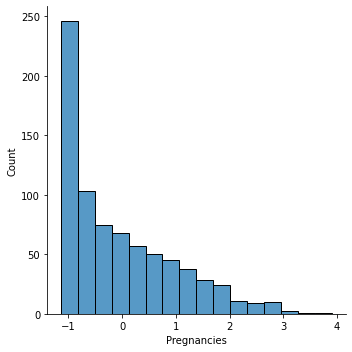

<Figure size 432x288 with 0 Axes>

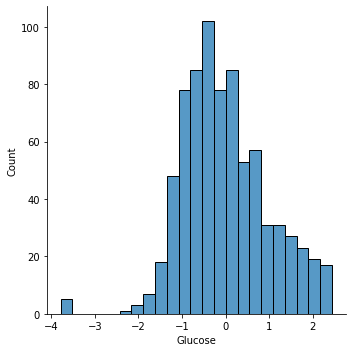

<Figure size 432x288 with 0 Axes>

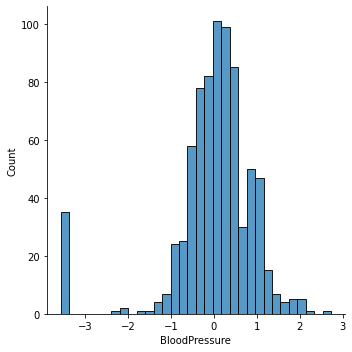

<Figure size 432x288 with 0 Axes>

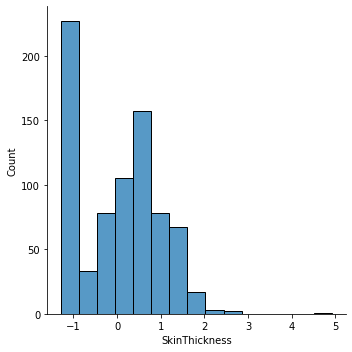

<Figure size 432x288 with 0 Axes>

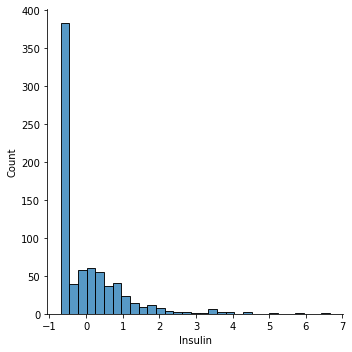

<Figure size 432x288 with 0 Axes>

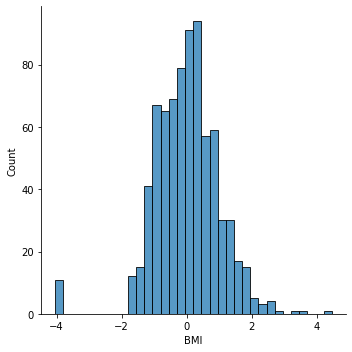

<Figure size 432x288 with 0 Axes>

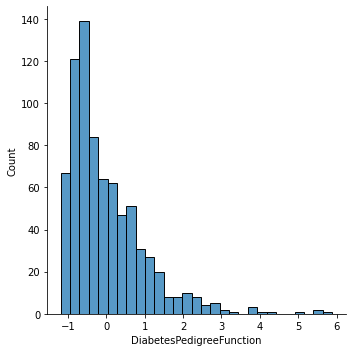

<Figure size 432x288 with 0 Axes>

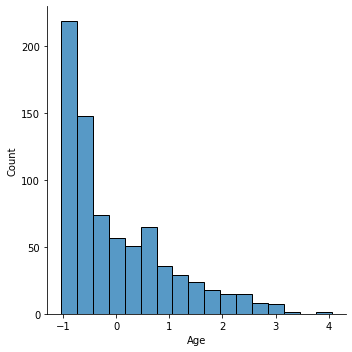

<Figure size 432x288 with 0 Axes>

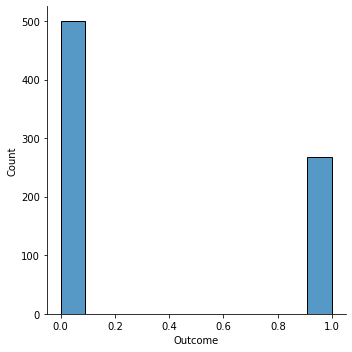

In [16]:
column=data.columns
for col in column:
 plt.figure();
 sns.displot(data[col])

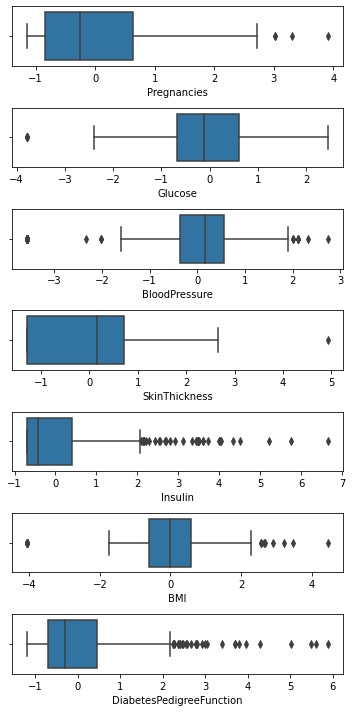

In [17]:
#data.iloc[:,1]
fig,axs=plt.subplots(nrows=7,figsize=(5,10))
for i in range(0,7):
  sns.boxplot(x=data.iloc[:,i],ax=axs[i]);
plt.tight_layout()

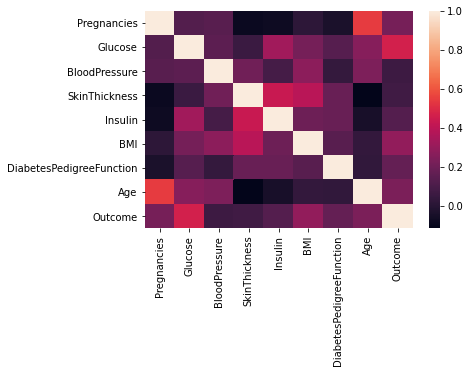

In [18]:
corr=data.corr()
sns.heatmap(corr)

In [19]:
x=data.iloc[:,0:7]
y=data['Outcome']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)
lr=LogisticRegression();
lr=lr.fit(x_train,y_train)


In [22]:
from sklearn.metrics import classification_report;
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       150
           1       0.79      0.47      0.59        81

    accuracy                           0.77       231
   macro avg       0.78      0.70      0.71       231
weighted avg       0.77      0.77      0.75       231



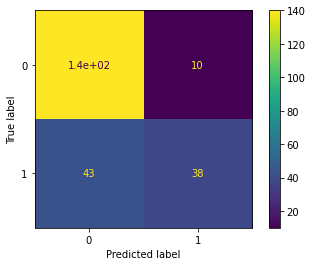

In [23]:
'''confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)'''
from sklearn.metrics import plot_confusion_matrix;
plot_confusion_matrix(lr,x_test,y_test)

In [33]:
Sensitivity=142/(10+142)
print("Sensitivity=TP/(TP+FN)=",Sensitivity)
specificity=38/(38+10)
print("Specificity=TN/(TN+FP)=",specificity)

Sensitivity=TP/(TP+FN)= 0.9342105263157895
Specificity=TN/(TN+FP)= 0.7916666666666666


Lets see if dealing with outlier can change the specificty and sensitivity 

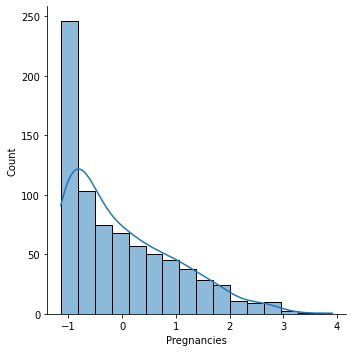

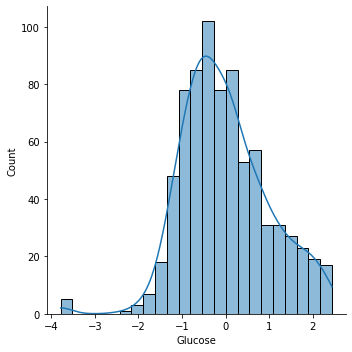

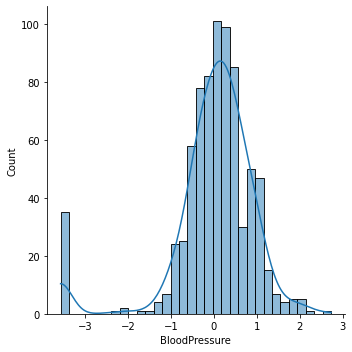

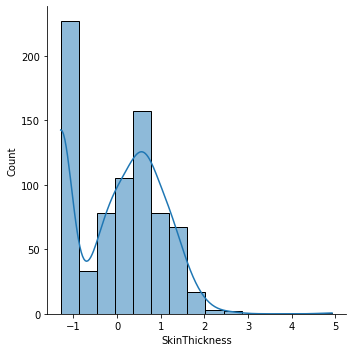

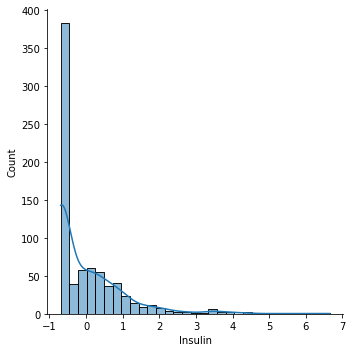

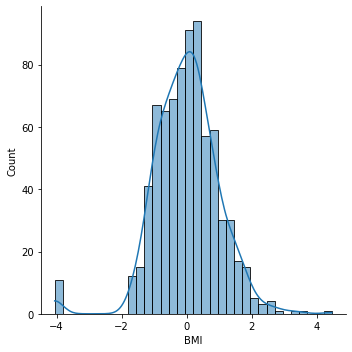

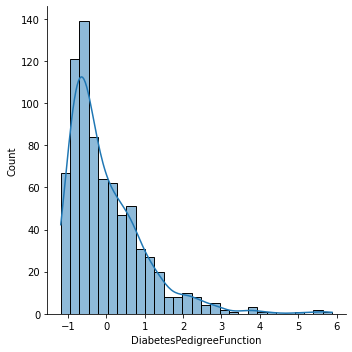

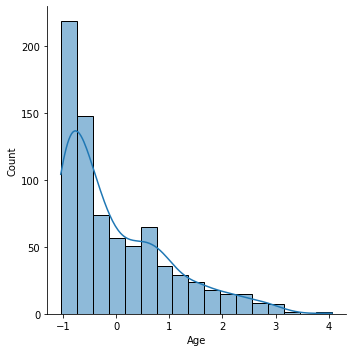

In [25]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in columns:
  sns.displot(data[col],kde=True)

In [26]:
ND=['BMI','BloodPressure','Glucose']
SD=['Age','DiabetesPedigreeFunction','Insulin','SkinThickness','Pregnancies']

For Normal distributed data we will use Zscore treatment to deal with outliers and for Skewed data we will use IQR treatment 

In [27]:
import scipy.stats as stats;
'''for col in ND:
  highest=3*data[col].std()+data[col].mean()
  lowest=data[col].mean()-3*data[col].std()
  data[col]=np.where(data[col]>highest,highest,np.where(data[col]<lowest,lowest,data[col]))
'''

'for col in ND:\n  highest=3*data[col].std()+data[col].mean()\n  lowest=data[col].mean()-3*data[col].std()\n  data[col]=np.where(data[col]>highest,highest,np.where(data[col]<lowest,lowest,data[col]))\n'

In [24]:
'''for col in ND:
  highest=3*data[col].std()+data[col].mean()
  lowest=data[col].mean()-3*data[col].std()
  for i in data[col]:
    if(i>highest or i<lowest):
      data[col]=data[col].replace(i,data[col].mean())
'''

'for col in ND:\n  highest=3*data[col].std()+data[col].mean()\n  lowest=data[col].mean()-3*data[col].std()\n  for i in data[col]:\n    if(i>highest or i<lowest):\n      data[col]=data[col].replace(i,data[col].mean())\n'

In [28]:
for col in ND:
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr;
  lower=q1-1.5*iqr;
  for i in data[col]:
    if(i>upper or i<lower):
      data[col]=data[col].replace(i,np.median(data[col]))

Using IQR cappling is giving the best result so far.
We could also use Forest Isolation and DBSCAN for detection of outliers. (***They might give better results check them***)

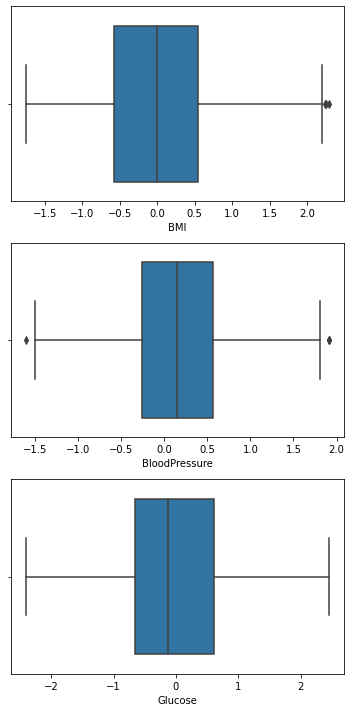

In [29]:
fig,axs=plt.subplots(nrows=3,figsize=(5,10))
i=0;
for col in ND:
  sns.boxplot(x=data[col],ax=axs[i]);
  i=i+1;
plt.tight_layout()

In [42]:
for col in SD:
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr;
  lower=q1-1.5*iqr;
  for i in data[col]:
    if(i>upper or i<lower):
      data[col]=data[col].replace(i,np.median(data[col]))

In [ ]:
'''for col in SD:
  highest=3*data[col].std()+data[col].mean()
  lowest=data[col].mean()-3*data[col].std()
  data[col]=np.where(data[col]>highest,highest,np.where(data[col]<lowest,lowest,data[col]))
  '''

In [ ]:
'''for col in ND:
  highest=3*data[col].std()+data[col].mean()
  lowest=data[col].mean()-3*data[col].std()
  for i in data[col]:
    if(i>highest or i<lowest):
      data[col]=data[col].replace(i,data[col].median())
'''


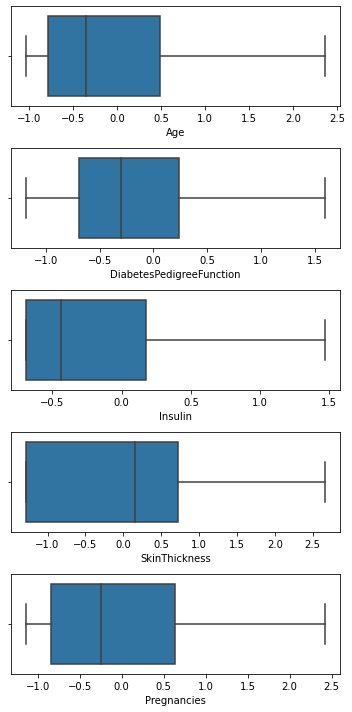

In [43]:
fig,axs=plt.subplots(nrows=5,figsize=(5,10))
i=0;
for col in SD:
  sns.boxplot(x=data[col],ax=axs[i]);
  i=i+1;
plt.tight_layout()

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)
lr=LogisticRegression();
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       163
           1       0.60      0.54      0.57        68

    accuracy                           0.76       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.75      0.76      0.75       231



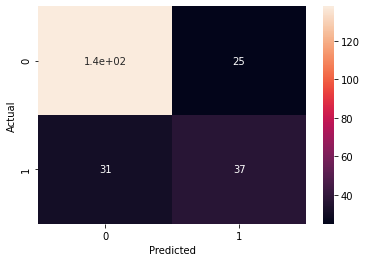

In [45]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

In [41]:
Sensitivity=132/(20+132)
print("Sensitivity=TP/(TP+FN)=",Sensitivity)
specificity=40/(40+37)
print("Specificity=TN/(TN+FP)=",specificity)

Sensitivity=TP/(TP+FN)= 0.868421052631579
Specificity=TN/(TN+FP)= 0.5194805194805194


So Our sensitivity and specificity did get affected.
Maybe using Normalization could have given different results.
